In [ ]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [374]:
# Load dataset
df = pd.read_csv("Fertilizer Prediction.csv")

# Show first 5 rows
df.head()


,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [376]:
print(df.isnull().sum())

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64


In [378]:
print("Unique Crops:",df['Crop Type'].unique())
print("Soil Types:", df['Soil Type'].unique())
print("Unique Fertilizers:", df['Fertilizer Name'].unique())

Unique Crops: ['Maize' 'Sugarcane' 'Cotton' 'Tobacco' 'Paddy' 'Barley' 'Wheat' 'Millets'
 'Oil seeds' 'Pulses' 'Ground Nuts']
Soil Types: ['Sandy' 'Loamy' 'Black' 'Red' 'Clayey']
Unique Fertilizers: ['Urea' 'DAP' '14-35-14' '28-28' '17-17-17' '20-20' '10-26-26']


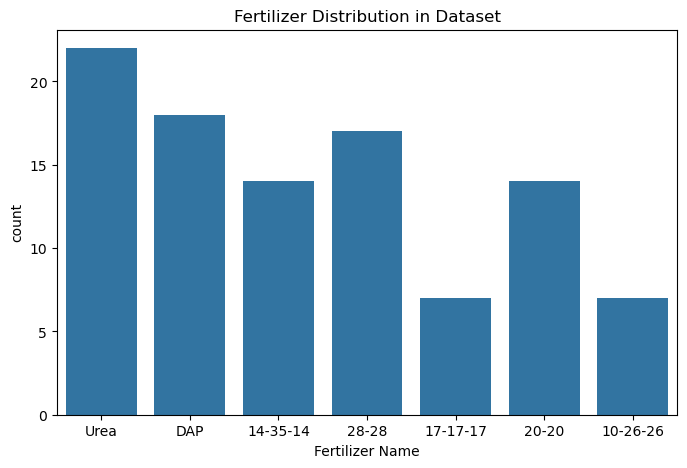

In [380]:
# Plot distribution of fertilizers
plt.figure(figsize=(8,5))
sns.countplot(x='Fertilizer Name', data=df)
plt.xticks(rotation=0)
plt.title("Fertilizer Distribution in Dataset")
plt.show()

In [381]:
# Initialize LabelEncoder
le_soil = LabelEncoder()
le_crop = LabelEncoder()
le_fert = LabelEncoder()


# Encode categorical features
df['Soil Type'] = le_soil.fit_transform(df['Soil Type'])
df['Crop Type'] = le_crop.fit_transform(df['Crop Type'])
df['Fertilizer Name'] = le_fert.fit_transform(df['Fertilizer Name'])


soil_mapping = pd.DataFrame({
    'Soil Type': le_soil.classes_,
    'Encoded': range(len(le_soil.classes_))
})
print("Soil Type Mapping:")
print(soil_mapping)

crop_mapping = pd.DataFrame({
    'Crop Type': le_crop.classes_,
    'Encoded': range(len(le_crop.classes_))
})
print("\nCrop Type Mapping:")
print(crop_mapping)
fert_mapping = pd.DataFrame({
    'Fertilizer Name': le_fert.classes_,
    'Encoded': range(len(le_fert.classes_))
})
print("\nFertilizer Name Mapping:")
print(fert_mapping)




Soil Type Mapping:
  Soil Type  Encoded
0     Black        0
1    Clayey        1
2     Loamy        2
3       Red        3
4     Sandy        4

Crop Type Mapping:
      Crop Type  Encoded
0        Barley        0
1        Cotton        1
2   Ground Nuts        2
3         Maize        3
4       Millets        4
5     Oil seeds        5
6         Paddy        6
7        Pulses        7
8     Sugarcane        8
9       Tobacco        9
10        Wheat       10

Fertilizer Name Mapping:
  Fertilizer Name  Encoded
0        10-26-26        0
1        14-35-14        1
2        17-17-17        2
3           20-20        3
4           28-28        4
5             DAP        5
6            Urea        6


In [384]:
# Features (X) and Target (y)
X = df.drop('Fertilizer Name', axis=1)
y = df['Fertilizer Name']

# Split into training and testing set (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)


In [386]:
# Initialize model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

Accuracy: 1.0


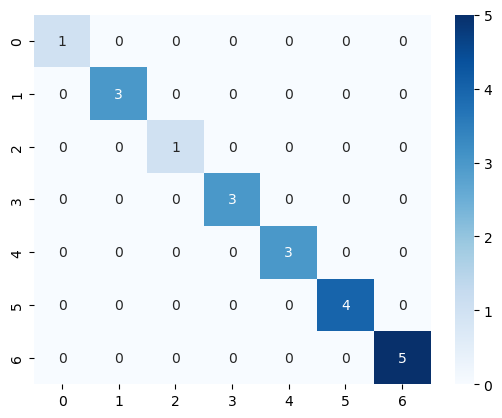

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [387]:
# Predict on test data
y_pred = rf_model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))


In [388]:
def recommend_fertilizer_text(temp, hum, moist, soil, crop, N, P, K):

    # Check if soil and crop exist in trained encoders
    if soil not in le_soil.classes_:
        return f"Error: Soil type '{soil}' not found. Available types: {list(le_soil.classes_)}"
    if crop not in le_crop.classes_:
        return f"Error: Crop type '{crop}' not found. Available types: {list(le_crop.classes_)}"
    
    # Encode soil and crop
    soil_encoded = le_soil.transform([soil])[0]
    crop_encoded = le_crop.transform([crop])[0]
    
    # Prepare input as DataFrame with correct column names
    sample_df = pd.DataFrame([[temp, hum, moist, soil_encoded, crop_encoded, N, K, P]],
                             columns=X.columns)
    
    # Predict fertilizer
    pred = rf_model.predict(sample_df)
    fertilizer_name = le_fert.inverse_transform(pred)[0]
    
    return f"Recommended Fertilizer: {fertilizer_name}"


In [390]:
# Sample Input 1
print(recommend_fertilizer_text(30, 70, 35, 'Loamy', 'Paddy', 10, 60, 30))

Recommended Fertilizer: 14-35-14


In [394]:
# Sample Input 2
print(recommend_fertilizer_text(32, 65, 40, 'Sandy', 'Wheat', 20, 45, 50))

Recommended Fertilizer: 28-28


In [396]:
# Sample Input 3
print(recommend_fertilizer_text(28, 75, 30, 'Black', 'Maize', 30, 50, 40))

Recommended Fertilizer: Urea


In [398]:
# Sample Input 4
print(recommend_fertilizer_text(35, 60, 45, 'Red', 'Millets', 0, 30, 35))


Recommended Fertilizer: 14-35-14


In [400]:
# Sample Input 5
print(recommend_fertilizer_text(29, 80, 38, 'Clayey', 'Barley', 55, 60, 45))


Recommended Fertilizer: Urea


In [402]:
# Sample Input 6
print(recommend_fertilizer_text(29, 52, 45, 'Loamy', 'Sugarcane', 12, 0, 36))


Recommended Fertilizer: 17-17-17
